<a href="https://colab.research.google.com/github/isabellylopes/Projeto_Arvores_Florestas/blob/main/Projeto_%C3%81rvores_de_Decis%C3%A3o_e_Florestas_Aleat%C3%B3rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analista - Isabelly Cristine Lopes

Github - https://github.com/isabellylopes

Linkedin - https://www.linkedin.com/in/isabelly-cristine-lopes-8a9b59204/

Exercício do Curso : https://www.udemy.com/course/python-para-data-science-e-machine-learning

# Projeto florestas aleatórias

Para este projeto, estaremos explorando dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. Você pode baixar os dados de [aqui](https://www.lendingclub.com/info/download-data.action). O csv que usarei está limpo dos valores de NA.

O projeto consiste fazer em fazer um modelo de árvore de decisão usando todas variáveis para tentar prever se o contrato(not.fully.paid) foi pago ou não.


Aqui estão o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

In [1]:
#Importação das Bibliotecas inicias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Obtenção de dados

data = pd.read_csv('/content/loan_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análise exploratória de dados 

Vamos fazer alguma visualização de dados! Usaremos os recursos de plotagem incorporados ao seaborn e ao pandas. 

* Criarei um histograma de duas distribuições FICO umas sobre as outras, uma para cada um dos valores possíveis de credit.policy, lembrando que só existem dois valores como já citados acima: 0 e 1.

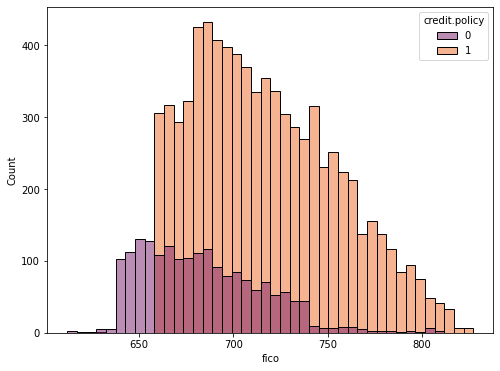

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data, x='fico', hue='credit.policy', palette='inferno')


* Figura semelhante, mas dessa vez usando a coluna 'not.fully.paid' como hue.

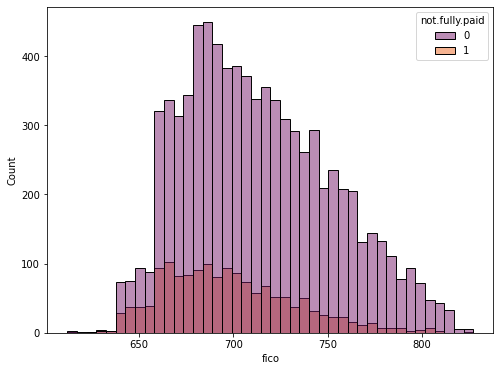

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data, x='fico', hue='not.fully.paid', palette='inferno')

* Criarei um countplot usando mostrando a contagens de empréstimos por finalidade, com a matiz de cor definido por not.fully.paid.

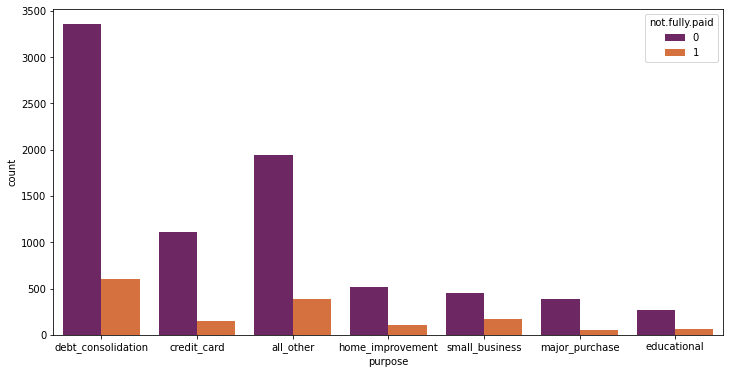

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='purpose', hue='not.fully.paid', palette='inferno')

* Criarei um Joinplot entre o índice 'FICO' e a taxa de juros(int.rate).

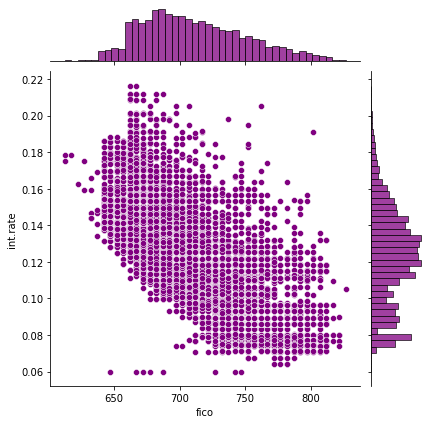

In [ ]:
sns.jointplot(data=data, x='fico', y='int.rate', color='purple')

* Agora verificarei se a tendência entre 'not.fully.paid' e 'credit.policy usando o gráfico de dispersão linear.

<Figure size 432x576 with 0 Axes>

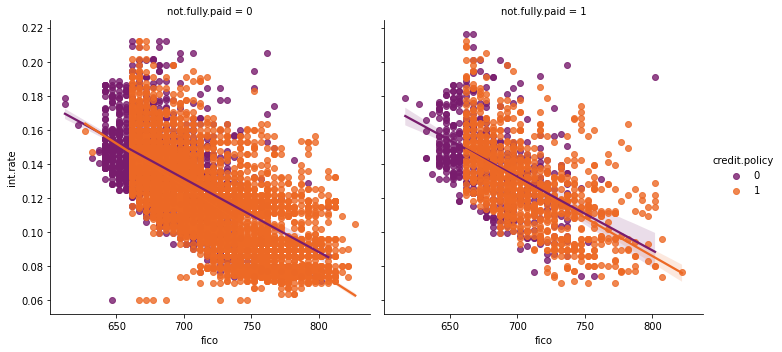

In [ ]:
plt.figure(figsize=(6,8))
sns.lmplot(data= data, x='fico', y='int.rate', hue= 'credit.policy', col='not.fully.paid', palette='inferno')

# Configurando os dados

Vou configurar os dados para o modelo de classificação de florestas aleatórias. Observando o .info() do DataFrame novamente.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Irei usar a coluna 'purpose' como categória. Esta coluna indica o objetivo do empréstimo. Isso significa que precisarei transformá-los usando variáveis dummys para que Sklearn possa compreendê-las.

* Criando uma lista de 1 elemento contendo a string 'purpose'.

In [20]:
temp = ['purpose']

* Agora criarei um DataFrame que terá novas colunas de recursos com as variavéis dummy.

In [21]:
final_data = pd.get_dummies(data,columns=temp, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Divisão Treino-Teste de dados

Agora é hora de dividir nossos dados em um conjunto de treinamento e um conjunto de testes!


In [29]:
from sklearn.model_selection import train_test_split

In [53]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Treinando a Decision Tree Model

Vamos começar treinando uma única árvore de decisão primeiro e depois criar uma instância e fitar com os dados de teste.


In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
dtree = DecisionTreeClassifier()

In [56]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Previsões e avaliação da árvore de decisão



In [57]:
pred = dtree.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2414
           1       0.20      0.23      0.22       460

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [60]:
print(confusion_matrix(y_test, pred))

[[1986  428]
 [ 353  107]]


# Treinando o modelo de florestas aleatórias

Farei com os mesmos parâmetros que a Decision Model Tree

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Previsões e avaliação das florestas aleatórias

In [50]:
pred = rfc.predict(X_test)

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.48      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [52]:
print(confusion_matrix(y_test, pred))

[[2419   12]
 [ 432   11]]


# Avaliações dos modelos

Ambos os modelos não performaram bem. 

* Como podemos observar no classification_report, na coluna 'recall' de cada modelo que performaram um pouco mais de que 50% do total.

* Na matriz de confusão voltamos a ver que o modelo não teve um bom desempenho com casos de Falsos Negativos/Positivos tendo maior notoriedade do que os Verdadeiros, como na Árvore de Decisão.

